In [1]:
using Pkg
pkg"status"

┌ Warning: The Pkg REPL interface is intended for interactive use, use with caution from scripts.
└ @ Pkg.REPLMode /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.6/Pkg/src/REPLMode/REPLMode.jl:378


      Status 

`~/d/Julia/MTK_Circuits/Project.toml`


  [f68482b8] Cthulhu v1.6.1
  [0c46a032] DifferentialEquations v6.19.0
  [e9467ef8] GLMakie v0.4.4
  [23fbe1c1] Latexify v0.15.6
  [961ee093] ModelingToolkit v6.4.2
  [91a5bcdd] Plots v1.20.1
  [d330b81b] PyPlot v2.9.0


In [2]:
include("pendulums.jl")

get_sol (generic function with 1 method)

In [3]:
@named a = Mass(xy = [1.2/√2, -1.2/√2])

Model a with 2 equations
States (4):
  pos[1](t) [defaults to 0.848528]
  pos[2](t) [defaults to -0.848528]
  v[1](t) [defaults to 0.0]
  v[2](t) [defaults to 0.0]
Parameters (1):
  m [defaults to 1.0]

In [4]:
@named spr = Spring(k = 5e3)

Model spr with 0 equations
States (3):
  x(t)
  dir[1](t)
  dir[2](t)
Parameters (2):
  k [defaults to 5000.0]
  l [defaults to 1.0]

In [5]:
eqs = [
    connect_spring(spr, a, [0., 0.])
    collect(D.(a.v) .~ spring_force(spr) / a.m .+ g)
]

5-element Vector{Equation}:
 spr₊x(t) ~ sqrt(abs2(a₊pos[1](t)) + abs2(a₊pos[2](t)))
 spr₊dir[1](t) ~ a₊pos[1](t)
 spr₊dir[2](t) ~ a₊pos[2](t)
 Differential(t)(a₊v[1](t)) ~ -spr₊k*spr₊dir[1](t)*(a₊m^-1)*(spr₊x(t) - spr₊l)*(spr₊x(t)^-1)
 Differential(t)(a₊v[2](t)) ~ -9.81 - (spr₊k*spr₊dir[2](t)*(a₊m^-1)*(spr₊x(t) - spr₊l)*(spr₊x(t)^-1))

In [11]:
sol, sys = get_sol(eqs, a, spr; tspan = (0., 10.));

In [12]:
sys

Model model with 4 equations
States (4):
  a₊v[1](t) [defaults to 0.0]
  a₊v[2](t) [defaults to 0.0]
  a₊pos[1](t) [defaults to 0.848528]
  a₊pos[2](t) [defaults to -0.848528]
Parameters (6):
  spr₊l [defaults to 1.0]
  spr₊k [defaults to 5000.0]
  a₊m [defaults to 1.0]
  a₊m [defaults to 1.0]
⋮
Incidence matrix:
 ×  ⋅  ⋅  ⋅  ⋅  ⋅  ×  ×
 ⋅  ×  ⋅  ⋅  ⋅  ⋅  ×  ×
 ⋅  ⋅  ×  ⋅  ×  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ×  ⋅  ×  ⋅  ⋅

In [8]:
using Plots

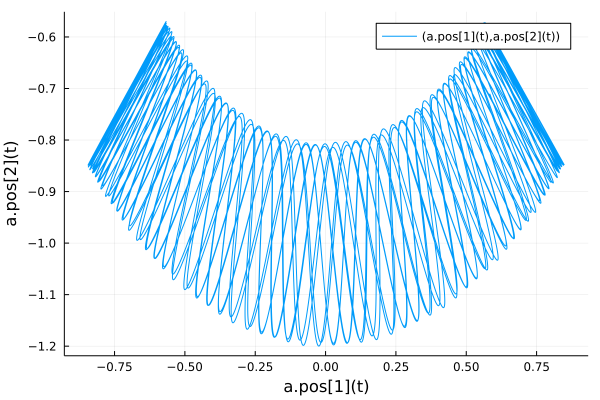

In [9]:
plot(sol, vars = (a.pos...,))

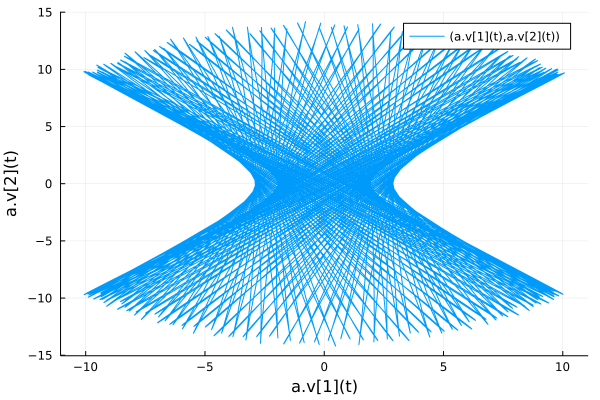

In [10]:
plot(sol, vars = (a.v...,))

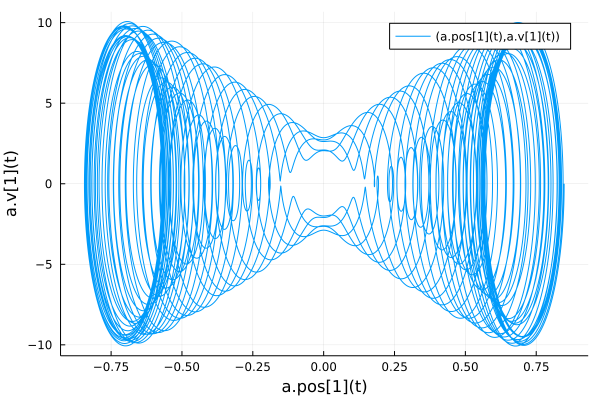

In [15]:
plot(sol, vars = (a.pos[1], a.v[1]))

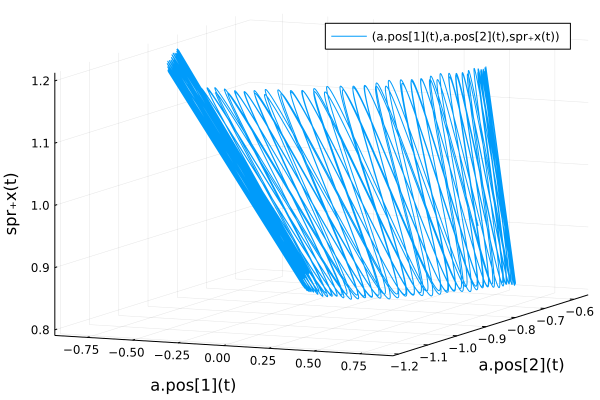

In [16]:
plot(sol, vars = (a.pos[1], a.pos[2], spr.x))